In [120]:
#checked!!

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter


In [121]:
real_order = [124, 116, 118, 123, 115, 117, 125, 51, 59, 111, 32, 102, 
              108, 42, 62, 37, 99, 44, 103, 48, 26, 96, 31, 106, 95, 
              45, 105, 38, 41, 107, 119, 97, 33, 43, 30, 94, 13, 79, 
              15, 83, 80, 27, 29, 12, 88, 76, 11, 78, 4, 17, 81, 75, 
              19, 74, 14, 6, 67, 68, 1, 10, 65, 5, 64, 63, 0, 66, 69, 
              71, 70, 2, 73, 8, 7, 84, 3, 72, 91, 77, 85, 20, 82, 21,
              24, 9, 18, 28, 104, 22, 110, 87, 25, 86, 89, 92, 35, 90,
              40, 36, 100, 50, 47, 16, 93, 39, 23, 98, 34, 56, 114, 57, 
              101, 113, 54, 46, 52, 49, 60, 55, 120, 53, 58, 109, 112, 61, 122, 121]


races2 = ['White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone',
       'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone',
       'White; Black or African American',
       'White; American Indian and Alaska Native',
       'White; Asian',
       'White; Native Hawaiian and Other Pacific Islander',
       'White; Some Other Race',
       'Black or African American; American Indian and Alaska Native',
       'Black or African American; Asian',
       'Black or African American; Native Hawaiian and Other Pacific Islander',
       'Black or African American; Some Other Race',
       'American Indian and Alaska Native; Asian',
       'American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
       'American Indian and Alaska Native; Some Other Race',
       'Asian; Native Hawaiian and Other Pacific Islander',
       'Asian; Some Other Race',
       'Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native',
       'White; Black or African American; Asian',
       'White; Black or African American; Native Hawaiian and Other Pacific Islander',
       'White; Black or African American; Some Other Race',
       'White; American Indian and Alaska Native; Asian',
       'White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
       'White; American Indian and Alaska Native; Some Other Race',
       'White; Asian; Native Hawaiian and Other Pacific Islander',
       'White; Asian; Some Other Race',
       'White; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Black or African American; American Indian and Alaska Native; Asian',
       'Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
       'Black or African American; American Indian and Alaska Native; Some Other Race',
       'Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
       'Black or African American; Asian; Some Other Race',
       'Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
       'American Indian and Alaska Native; Asian; Some Other Race',
       'American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native; Asian',
       'White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
       'White; Black or African American; American Indian and Alaska Native; Some Other Race',
       'White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
       'White; Black or African American; Asian; Some Other Race',
       'White; Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
       'White; American Indian and Alaska Native; Asian; Some Other Race',
       'White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
       'Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
       'Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
       'White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race']

races = ['Total!!Population of one race!!White alone',
           'Total!!Population of one race!!Black or African American alone',
           'Total!!Population of one race!!American Indian and Alaska Native alone',
           'Total!!Population of one race!!Asian alone',
           'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander alone',
           'Total!!Population of one race!!Some Other Race alone',
           'Total!!Two or More Races!!Population of two races!!White; Black or African American',
           'Total!!Two or More Races!!Population of two races!!White; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of two races!!White; Asian',
           'Total!!Two or More Races!!Population of two races!!White; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!White; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Black or African American; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Asian',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!Asian; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Asian',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of six races!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race']
            
    

In [122]:
#Accuracy metric from page 13 of https://arxiv.org/pdf/1912.03250.pdf
#INPUT:
# mu: parameter
# p_histogram: histogram (1D array of length n) of population sizes for the true data
# q_histogram: histogram (1D array of length n) of population sizes for the de-identified data
#--------------------------------------------------------------------------
#OUTPUT:
# div: a real number representing the mu-smoothed KL divergence between distributions P and Q
def Dkl(mu, p_histogram, q_histogram):
    div = 0
    for i in range(len(p_histogram)):
        s = (p_histogram[i] + mu)*np.log((p_histogram[i] + mu)/(q_histogram[i] + mu))
        div += s
    return div

In [123]:
#Returns mu-smoothed KL divergence between a given original dataset & a de-identified dataset 

#INPUT:
# county: string of the county from which to use original data
#file: swapping file to evaluate performance of 
#threshold: cut off for consideration as minority group 
#mu: parameter for Dkl
#--------------------------------------------------------------------------
#OUTPUT:
#Returns real-valued mu-smoothed KL divergence value 

def get_hists_swap(county, file, threshold):
    
    #ORIGINAL DATA
    
    #import original dataset & delete unnecessary rows
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    #replace race w/ value 0-126; where 0-62 represent non-hispanic and 63-126 represent hispanic
    for index, row in df_orig.iterrows():
        d = row['race']
        h = row['hispanic']
        #if hispanic, increment to 63-126 range
        if d in races and h==1:
            df_orig.at[index, 'race'] = races.index(d)+63
        #else, 0-63 range
        elif d in races and h==0:
            df_orig.at[index, 'race'] = races.index(d)
    
    
    #get list of occurrences by race using counter - original dataset
    #LABELS_ALL = race numbers 0-126
    #VALUES_ALL = associated counts for race numbers 0-126
    labels_all = []
    vals_all = []
    for key1, value1 in df_orig.iteritems():
        if(key1 == 'race'):
            labs, vals = zip(*Counter(value1).items())
            labs = list(labs)
            vals = list(vals)
            #for each race value, get number of occurences and append label and value of each
            for i in range(0, len(real_order)):
                if i not in labs:
                    labels_all.append(i)
                    vals_all.append(0)
                elif i in labs:
                    pos = labs.index(i)
                    labels_all.append(i)
                    vals_all.append(vals[pos])   
    labels_all = np.arange(0,len(real_order),1)
        
    
    #get associated race counts for hispanic and non-hispanic
    orig_nonhisp_vals = vals_all[0:63]
    orig_hisp_vals = vals_all[63:]
    
    #create dataframe of his/non-his counts for each race; for ORIGINAL dataframe
    orig = pd.DataFrame({'Nonhispanic':orig_nonhisp_vals, 'Hispanic':orig_hisp_vals})
               
    
    #SWAPPING DATA
    
    #import original dataset & delete unnecessary rows
    df2 = pd.read_csv(file)
    #replace race w/ value 0-126; where 0-62 represent non-hispanic and 63-126 represent hispanic
    for index, row in df2.iterrows():
        d = row['race']
        h = row['hispanic']
        #if hispanic, increment to 63-126 range
        #0-62 represent non-hispanic and 63-126 represent hispanic
        if h==1:
            df2.at[index, 'race'] = d+63
    

    #get list of occurrences by race using counter - de-identified swapping dataset
    #LABELS2_ALL = race numbers 0-126
    #VALUES2_ALL = associated counts for race numbers 0-126
    labels2_all = []
    vals2_all = []    
    for key, value in df2.iteritems():
        if(key == 'race'):
            labels2, values2 = zip(*Counter(value).items())
            labels2=list(labels2)
            values2 = list(values2)
            for i in range(0, len(real_order)):
                if i not in labels2:
                    labels2_all.append(i)
                    vals2_all.append(0)
                elif i in labels2:
                    pos = labels2.index(i)
                    labels2_all.append(i)
                    vals2_all.append(values2[pos])
    labels2_all = np.arange(0,len(real_order),1)
    
    #get associated race counts for hispanic and non-hispanic
    new_nonhisp_vals = vals2_all[0:63]
    new_hisp_vals = vals2_all[63:]
    
    #create dataframe of his/non-his counts for each race; for ORIGINAL dataframe
    new = pd.DataFrame({'Nonhispanic':new_nonhisp_vals, 'Hispanic':new_hisp_vals})
    

    
    #iterate over columns to find total population
    total = 0
    for index, row in orig.iterrows():
        total = total + row['Hispanic']+row['Nonhispanic']

    
    q_histogram = [0 for i in range(126)]
    p_histogram = [0 for i in range(126)]
    
    #compute q_histogram and p_histogram, including all groups with population fraction <= threshold in original dataset
    #q_histogram contains population sizes of those groups in new dataset
    #p_histogram contains population sizes of those groups in old dataset
    #all entries corresponding to groups with population fraction > threshold are 0
    for index, val in enumerate(vals_all):
        if val/total <= threshold and index <= 62:
            q_histogram[index] = new.at[index, 'Nonhispanic']
            p_histogram[index] = val
        if val/total <= threshold and index >= 63:
            q_histogram[index] = new.at[index-63, 'Hispanic']
            p_histogram[index] = val
    q_histogram = np.array(q_histogram)
    p_histogram = np.array(p_histogram)
            
    # remove negative values from q_histogram
    q_histogram = np.maximum(q_histogram, np.zeros(126))
    return p_histogram, q_histogram

  

In [124]:
#INPUT:
# county: string specifying the county of interest
# file: string specifying the file for the de-identified data
# threshold: float defining the maximum population fraction of minority categories
#----------------------------------------------------------
#OUTPUT:
# p_histogram: 1D numpy array with length 126. contains population sizes in orig data of minority categories
# q_histogram: 1D numpy array with length 126. contains populations sizes in de-identified data of minority categories
def get_hists_dp(county, file, threshold):
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    for index, row in df_orig.iterrows():
        d = row['race']
        h = row['hispanic']
        if d in races and h==1:
            df_orig.at[index, 'race'] = races.index(d)+63
        elif d in races and h==0:
            df_orig.at[index, 'race'] = races.index(d)
    labels_all = []
    vals_all = []

    #get list of occurrences by race - orig
    for key1, value1 in df_orig.iteritems():
        if(key1 == 'race'):
            labs, vals = zip(*Counter(value1).items())
            labs = list(labs)
            vals = list(vals)
            for i in range(0, len(real_order)):
                if i not in labs:
                    labels_all.append(i)
                    vals_all.append(0)
                elif i in labs:
                    pos = labs.index(i)
                    labels_all.append(i)
                    vals_all.append(vals[pos])   
    labels_all = np.arange(0,len(real_order),1)
    
    orig_nonhisp_vals = vals_all[0:63]
    orig_hisp_vals = vals_all[63:]

    q_histogram = [0 for i in range(126)]
    p_histogram = [0 for i in range(126)]
    
    
    
    df2 = pd.read_csv(file)      #dataframe corresponding to new dataset, with 63 rows (for each race) and 2 cols (for H/NH)
    orig = pd.DataFrame({'Nonhispanic':orig_nonhisp_vals, 'Hispanic':orig_hisp_vals}) #same as df2, but for orig data


    #iterate over columns to find total population
    total = 0
    for index, row in orig.iterrows():
        total = total + row['Hispanic']+row['Nonhispanic']
        
    final = orig.copy()
    for col in final.columns:
        final[col].values[:] = 0
        
    orig_nonhisp_vals.extend(orig_hisp_vals)
        
        
    #compute q_histogram and p_histogram, including all groups with population fraction <= threshold in original dataset
    #q_histogram contains population sizes of those groups in new dataset
    #p_histogram contains population sizes of those groups in old dataset
    #all entries corresponding to groups with population fraction > threshold are 0
    for index, val in enumerate(vals_all):
        if val/total <= threshold and index <= 62:
            q_histogram[index] = df2.at[index, 'Nonhispanic']
            p_histogram[index] = val
        if val/total <= threshold and index >= 63:
            q_histogram[index] = df2.at[index-63, 'Hispanic']
            p_histogram[index] = val
    q_histogram = np.array(q_histogram)
    p_histogram = np.array(p_histogram)
            
    # remove negative values from q_histogram
    q_histogram = np.maximum(q_histogram, np.zeros(126))
    return p_histogram, q_histogram
    

In [125]:
# returns KL divergence between the orig data and new data, where threshold defines which groups are considered 
# minorities, and mu is the Dkl param
def get_dkl_dp(county, file, threshold, mu):
    
    # compute p_histogram and q_histogram
    p_histogram, q_histogram = get_hists_dp(county, file, threshold)

    return Dkl(mu, p_histogram/np.sum(p_histogram), q_histogram/np.sum(q_histogram))

In [126]:
# returns KL divergence between the orig data and new data, where threshold defines which groups are considered 
# minorities, and mu is the Dkl param
def get_dkl_swap(county, file, threshold, mu):
    
    # compute p_histogram and q_histogram
    p_histogram, q_histogram = get_hists_swap(county, file, threshold)

    return Dkl(mu, p_histogram/np.sum(p_histogram), q_histogram/np.sum(q_histogram))

In [127]:
def get_mse(A, B):
    mse = ((A - B)**2).mean(axis=0)
    return mse

In [128]:
# returns mse between the vector of minority race pops in the orig data and vector of minority race pops in the new data, 
# where threshold defines which groups are considered minorities
def get_mse_dp(county, file, threshold):
    p_histogram, q_histogram = get_hists_dp(county, file, threshold)
    return get_mse(p_histogram, q_histogram)

In [129]:
# returns mse between the vector of minority race pops in the orig data and vector of minority race pops in the new data, 
# where threshold defines which groups are considered minorities
def get_mse_swap(county, file, threshold):
    p_histogram, q_histogram = get_hists_swap(county, file, threshold)
    return get_mse(p_histogram, q_histogram)

In [89]:
def find_closest(A, target):
    #A must be sorted
    A=np.array(A)
    idx = A.searchsorted(target)
    idx = np.clip(idx, 1, len(A)-1)
    left = A[idx-1]
    right = A[idx]
    idx -= target - left < right - target
    return A[idx]

def run_for_dp(directory, output_directory, threshold, mu):
    #run for epsilon values in ep
    ep = np.arange(.01, 10, .05, float)
    
    #round epsilons to 2 decimal points
    epsilon = []    
    for ee in ep:
        ee = str(round(ee,2))
        if ee[len(ee)-1] == '.':
            ee = str(e)+'0'
        epsilon.append(ee)

    dfinal = pd.DataFrame(columns=['filename', 'dkl'])
    
    #run for all files 
    for filename in os.listdir(directory):
            if filename.endswith(".csv") and '_0.csv' in filename:
                #just to track status
#                 if '_0.csv' in filename:
#                     print(filename)
                #get dkl
                dkl = get_dkl_dp(county, directory+filename, threshold, mu)
                #save filename & data
                first = filename.find('_')
                last = filename.rfind('_')
                filename = filename[first+1:last]
                #find closest epsilon to filename 
                f = find_closest(ep, float(filename))
                print(f, filename)
#                 dfinal = dfinal.append({'filename': f, 'dkl': dkl}, ignore_index=True)
    
#     sorted = {}
#     for e in epsilon:
#         sorted[e] = []
        
#     for column_name, data in dfinal.iterrows():
                
#         for e in epsilon:
#             if str(data[0]) == str(e):
#                 sorted[e].append(data[1])
#                 break

#     for e in epsilon:
#         if len(sorted[e])==0:
#             sorted[e]=0
#         else:
#             sorted[e] = sum(sorted[e])/len(sorted[e])
                
#     final = pd.DataFrame(columns=['filename', 'dkl'])
#     for e in sorted:
#         final = final.append({'filename': e, 'dkl': sorted[e]}, ignore_index=True)
                    
#     csv_orig_data = final.to_csv(output_directory, index = True)
    
    
    
counties = ['Alameda', 'Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
counties = ['Alameda']
for county in counties:
    print(county)
    directory = '../dp/newdp_runs2/'+county+'/'
    output_directory = "mean_dif/"+county+"/dp/FINAL_DKL.csv"
    threshold = .1
    mu = .0001
    run_for_dp(directory, output_directory, threshold, mu)

Alameda
0.01 0.01
0.060000000000000005 0.06
0.11 0.11
0.16000000000000003 0.16
0.21000000000000002 0.21
0.26 0.26
0.31000000000000005 0.31
0.36000000000000004 0.36
0.41000000000000003 0.41
0.46 0.46
0.51 0.51
0.56 0.56
0.6100000000000001 0.61
0.66 0.66
0.7100000000000001 0.71
0.76 0.76
0.81 0.81
0.8600000000000001 0.86
0.91 0.91
0.9600000000000001 0.96
1.01 1.01
1.06 1.06
1.11 1.11
1.1600000000000001 1.16
1.2100000000000002 1.21
1.26 1.26
1.31 1.31
1.36 1.36
1.4100000000000001 1.41
1.4600000000000002 1.46
1.51 1.51
1.56 1.56
1.61 1.61
1.6600000000000001 1.66
1.7100000000000002 1.71
1.76 1.76
1.81 1.81
1.86 1.86
1.9100000000000001 1.91
1.9600000000000002 1.96
2.01 2.01
2.06 2.06
2.11 2.11
2.1599999999999997 2.15
2.21 2.21
2.26 2.26
2.31 2.31
2.36 2.36
2.41 2.41
2.46 2.46
2.51 2.51
2.56 2.56
2.61 2.61
2.66 2.66
2.71 2.71
2.76 2.76
2.81 2.81
2.86 2.86
2.91 2.91
2.96 2.96
3.01 3.01
3.06 3.06
3.11 3.11
3.16 3.16
3.21 3.21
3.26 3.26
3.31 3.31
3.36 3.36
3.41 3.41
3.46 3.46
3.51 3.51
3.56 3.56

In [83]:
def run_for_dp(directory, output_directory, threshold, mu):
    #run for epsilon values in ep
    ep = np.arange(.01, 10, .05, float)
    
    #round epsilons to 2 decimal points
    epsilon = []    
    for ee in ep:
        ee = str(round(ee,2))
        if ee[len(ee)-1] == '.':
            ee = str(e)+'0'
        epsilon.append(ee)

    dfinal = pd.read_csv (r'mean_dif/'+county+'/dp/FINAL.csv')
    dfinal = dfinal.loc[:, ~dfinal.columns.str.contains('^Unnamed')]
    dfinal = dfinal.loc[:, ~dfinal.columns.str.contains('mean_difference')]
    
    sorted = {}
    for e in epsilon:
        sorted[e] = []
        
    for column_name, data in dfinal.iterrows():
                
        for e in epsilon:
            if str(data[0]) == str(e):
                sorted[e].append(data[1])
                break

    for e in epsilon:
        if len(sorted[e])==0:
            sorted[e]=0
        else:
            sorted[e] = sum(sorted[e])/len(sorted[e])
                
    final = pd.DataFrame(columns=['filename', 'dkl'])
    for e in sorted:
        final = final.append({'filename': e, 'dkl': sorted[e]}, ignore_index=True)
                    
    csv_orig_data = final.to_csv(output_directory, index = True)
    
    
    
counties = ['Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']

for county in counties:
    print(county)
    directory = '../dp/newdp_runs2/'+county+'/'
    output_directory = "mean_dif/"+county+"/dp/FINAL_DKL.csv"
    threshold = .1
    mu = .0001
    run_for_dp(directory, output_directory, threshold, mu)

Armstrong
Cibola
Fayette
GrandForks
Hawaii
Jefferson
Nantucket
Washington


In [91]:
def run_for_swapping(directory, output_directory, threshold, mu):
    
    
    swaprate = np.arange(.01, 1, .05, float)
    
    swaprates = []
    
    for s in swaprate:
        swaprates.append(round(float(s),2))
    
    dfinal = pd.DataFrame(columns=['filename', 'dkl'])

    for filename in os.listdir(directory):
        
            if filename.endswith(".csv") : 
#                 if '_a0.csv' in filename:
#                     print(filename)
                
                dkl = get_dkl_swap(county, directory+filename, threshold, mu)
                #get mse
                #mse = get_mse_swap(county, directory+filename, threshold)                
                #save filename & data
                first = filename.find('_')
                last = filename.rfind('_')
                filename = filename[first+1:last]
                dfinal = dfinal.append({'filename': filename, 'dkl': dkl}, ignore_index=True)
                   
    sorted = {}
    for s in swaprates:
        sorted[s] = []
    
    for column_name, data in dfinal.iterrows():       

        for s in swaprates:
            if round(float(data[0]),2) == s: 
                sorted[s].append(data[1])
                break
    
    for s in swaprates:
        sorted[s] = sum(sorted[s])/len(sorted[s])
                
    final = pd.DataFrame(columns=['filename', 'dkl'])
    for s in sorted:
        final = final.append({'filename': s, 'dkl': sorted[s]}, ignore_index=True)
                
#     csv_orig_data = final.to_csv(output_directory, index = True)

    
counties = ['Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
counties = ['Alameda']
for county in counties:
    print(county)
    directory = '../swapping/swap_runs3/'+county+'/similar/'
    output_directory =  "mean_dif/"+county+"/similar/FINAL.csv"
    threshold = .1
    mu = .0001
    run_for_swapping(directory, output_directory, threshold, mu)
    
    

Alameda
{0.01: [0.023187931377345858, 0.00915309840539466, 0.0035776632796932872, 0.004859037590849961, 0.0049272528888607255, 0.009460046700989674, 0.005256982029820792, 0.003118895468861552, 0.0017168396113898625, 0.01523259590298929, 0.01072512837840574, 0.028815955751301817, 0.01608173558203313, 0.03441386743355719, 0.016892662498433922, 0.0385002083847573, 0.017391111203203292, 0.010685151939391416, 0.004446133962810245, 0.0006211429397511827, 0.004954359358406752, 0.0017642928706174258, 0.014251097477289672, 0.004381793539800735], 0.06: [0.08758794881168334, 0.04328587318548108, 0.09862231467520323, 0.06832584159123424, 0.07277102746646465, 0.06646234591071637, 0.09532018893469128, 0.065562685161271, 0.10899281872354599, 0.05965849523931064, 0.07889517205467103, 0.07104070465520015, 0.056189302618798044, 0.10629494849751643, 0.11006423752901512, 0.05354293445564951, 0.1081105362028131, 0.08276979987775158, 0.07301174894110002, 0.05629968092427406, 0.0557037491950574, 0.0879416843

In [139]:
def run_for_swapping2(directory, output_directory, threshold, mu):
    
    
    swaprate = np.arange(.01, 1, .05, float)
    
    swaprates = []
    
    for s in swaprate:
        swaprates.append(round(float(s),2))
    
    dfinal = pd.DataFrame(columns=['filename', 'dkl'])

    for filename in os.listdir(directory):
        
            if filename.endswith(".csv") : 
#                 if '_a0.csv' in filename:
#                     print(filename)
                
                dkl = get_dkl_swap(county, directory+filename, threshold, mu)
                #get mse
                #mse = get_mse_swap(county, directory+filename, threshold)                
                #save filename & data
                first = filename.find('_')
                last = filename.rfind('_')
                filename = filename[first+1:last]
                dfinal = dfinal.append({'filename': filename, 'dkl': dkl}, ignore_index=True)
                   
    sorted = {}
    for s in swaprates:
        sorted[s] = []
    
    for column_name, data in dfinal.iterrows():       

        for s in swaprates:
            if round(float(data[0]),2) == s: 
                sorted[s].append(data[1])
                break
    
    for s in swaprates:
        sorted[s] = sum(sorted[s])/len(sorted[s])
                
    final = pd.DataFrame(columns=['filename', 'dkl'])
    for s in sorted:
        final = final.append({'filename': s, 'dkl': sorted[s]}, ignore_index=True)
                
#     csv_orig_data = final.to_csv(output_directory, index = True)

    
counties = ['Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
counties = ['Alameda']
for county in counties:
    print(county)
    directory = '../swapping/swap_runs3/'+county+'/similar/'
    output_directory =  "mean_dif/"+county+"/similar/FINAL_DKL.csv"
    threshold = .1
    mu = .0001
    run_for_swapping2(directory, output_directory, threshold, mu)
    
counties = ['Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
counties = ['Alameda']
for county in counties:
    print(county)
    directory = '../swapping/swap_runs3/'+county+'/random/'
    output_directory =  "mean_dif/"+county+"/random/FINAL_DKL.csv"
    threshold = .1
    mu = .0001
    run_for_swapping2(directory, output_directory, threshold, mu)
    
    

Alameda
Alameda


In [12]:
#FOR TESTING: compute divergence for alameda county
county = 'alameda'
xs = np.arange(0, 10, .1)
ys = []
eps = ['0.51', '1.01', '2.01', '3.01', '4.01', '5.01', '6.01', '7.01', '8.01', '9.01']
# for filename in os.listdir('../dp/newdp_runs/'+county):
#     if filename.endswith(".csv") and '_0.csv' in filename:
#         print(filename)
#         div = get_dkl_dp(county, '../dp/newdp_runs/'+county+'/' +filename, 1, .1)
        
#         print(div)
#         ys.append(div)

# eps = ['100', '200', '500', '1000']
threshold = .1
divs = []
mses = []
print('threshold: ' + str(threshold))
for ep in eps:
    div = get_dkl_dp(county, '../dp/newdp_runs2/'+county+'/dprun_' + ep + '_0.csv', threshold, .0001)
    print('epsilon: ' + ep)
    mse = get_mse_dp(county, '../dp/newdp_runs/'+county+'/dprun_' + ep + '_0.csv', threshold)
    print('div: ' + str(div))
    #print('mse: ' + str(mse))
    
    divs.append(div)
    mses.append(mse)

print(divs)
    
    

threshold: 0.1
epsilon: 0.51
div: 0.3679956787237458
epsilon: 1.01
div: 0.29833620925310467
epsilon: 2.01
div: 0.08694800025863056
epsilon: 3.01
div: 0.029111901221849833
epsilon: 4.01
div: 0.01923521202405898
epsilon: 5.01
div: 0.0
epsilon: 6.01
div: 0.009189592092405458
epsilon: 7.01
div: 0.0
epsilon: 8.01
div: 0.0
epsilon: 9.01
div: 0.0
[0.3679956787237458, 0.29833620925310467, 0.08694800025863056, 0.029111901221849833, 0.01923521202405898, 0.0, 0.009189592092405458, 0.0, 0.0, 0.0]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


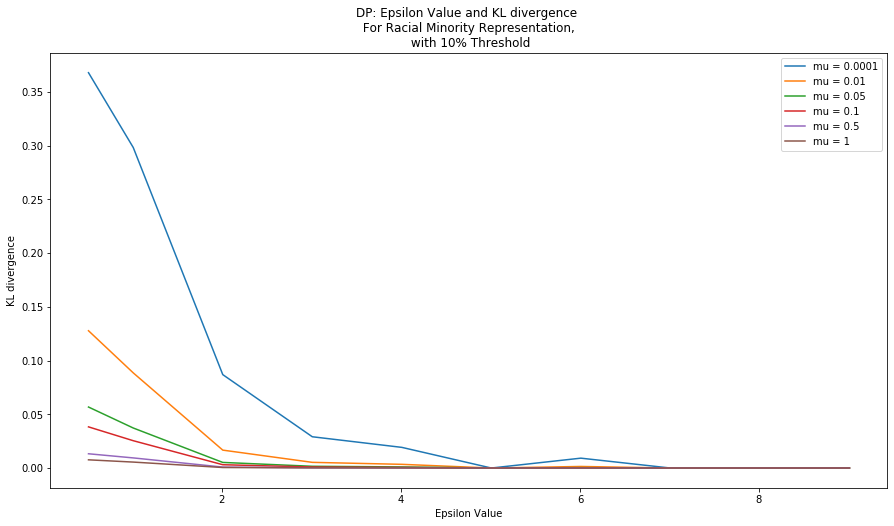

In [133]:
mus = [.0001, .01, .05, .1, .5, 1]
eps = ['0.51', '1.01', '2.01', '3.01', '4.01', '5.01', '6.01', '7.01', '8.01', '9.01']
xs = [.51, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01, 8.01, 9.01]
threshold = .1
plt.figure(figsize=(15,8))
for mu in mus:
    divs = []
    for ep in eps:
        div = get_dkl_dp(county, '../dp/newdp_runs2/'+county+'/dprun_' + ep + '_0.csv', threshold, mu)
        divs.append(div)
    plt.plot(xs, divs, label='mu = ' + str(mu))
axes= plt.axes()
plt.xlabel('Epsilon Value')
plt.ylabel('KL divergence')
plt.title('DP: Epsilon Value and KL divergence \n For Racial Minority Representation, \n with 10% Threshold')
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels, loc='upper right')
    
    

Alameda
['0.01', '0.060000000000000005', '0.11', '0.16000000000000003', '0.21000000000000002', '0.26', '0.31000000000000005', '0.36000000000000004', '0.41000000000000003', '0.46', '0.51', '0.56', '0.6100000000000001', '0.66', '0.7100000000000001', '0.76', '0.81', '0.8600000000000001', '0.91', '0.9600000000000001']
[0.023187931377345858, 0.08758794881168334, 0.20609306989584125, 0.4356900078435042, 0.5996350321312063, 1.0155337172055032, 0.9705218947005253, 0.9511387349979208, 1.0110646055199335, 1.0684202619673748, 1.1576985308097292, 1.0240845174797877, 1.197496972261486, 1.1616542529562508, 1.1708014499074113, 1.287713985433136, 1.5758143967323006, 1.3556256772871358, 1.3544510803856427, 1.3806823996413589]
['0.01', '0.060000000000000005', '0.11', '0.16000000000000003', '0.21000000000000002', '0.26', '0.31000000000000005', '0.36000000000000004', '0.41000000000000003', '0.46', '0.51', '0.56', '0.6100000000000001', '0.66', '0.7100000000000001', '0.76', '0.81', '0.8600000000000001', '0.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


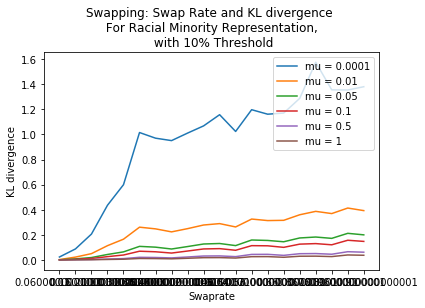

In [134]:
def run_for_swapping3(directory, output_directory, threshold, mus):
    
    
    for mu in mus:
        xs = []
        divs = []
        swaprate = np.arange(.01, 1, .05, float)

        swaprates = []

        for s in swaprate:
            swaprates.append(round(float(s),2))

        dfinal = pd.DataFrame(columns=['filename', 'dkl'])

        for filename in os.listdir(directory):

                if filename.endswith(".csv")  and '_a0.csv' in filename: 
    #                 if '_a0.csv' in filename:
    #                     print(filename)

                    dkl = get_dkl_swap(county, directory+filename, threshold, mu)
                    #get mse
                    #mse = get_mse_swap(county, directory+filename, threshold)                
                    #save filename & data
                    first = filename.find('_')
                    last = filename.rfind('_')
                    filename = filename[first+1:last]
                    xs.append(filename)
                    divs.append(dkl)
        print(xs)
        print(divs)
        plt.plot(xs, divs, label='mu = ' + str(mu))
    axes= plt.axes()
    plt.xlabel('Swaprate')
    plt.ylabel('KL divergence')
    plt.title('Swapping: Swap Rate and KL divergence \n For Racial Minority Representation, \n with 10% Threshold')
    handles, labels = axes.get_legend_handles_labels()
    axes.legend(handles, labels, loc='upper right')

 

    
counties = ['Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
counties = ['Alameda']
for county in counties:
    print(county)
    directory = '../swapping/swap_runs3/'+county+'/similar/'
    output_directory =  "mean_dif/"+county+"/similar/FINAL.csv"
    threshold = .1
    mus = [.0001, .01, .05, .1, .5, 1]
    run_for_swapping3(directory, output_directory, threshold, mus)
    
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


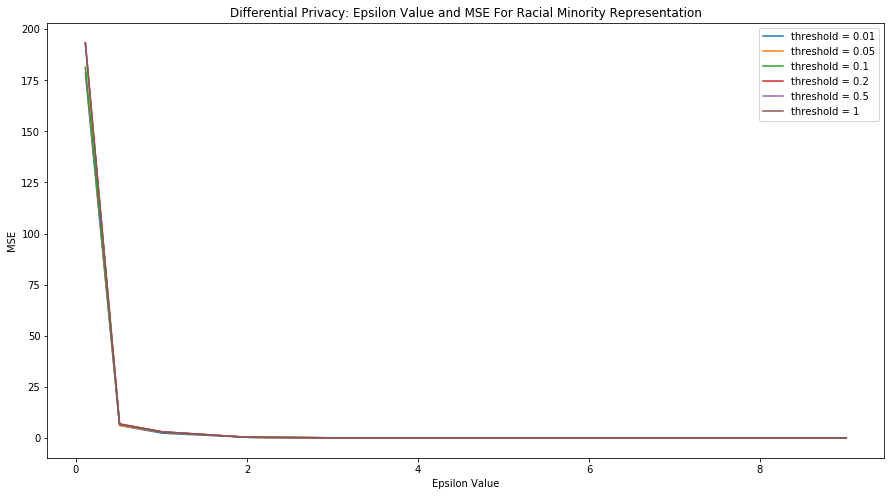

In [117]:
eps = ['0.11','0.51', '1.01', '2.01', '3.01', '4.01', '5.01', '6.01', '7.01', '8.01', '9.01']
#eps = ['0.11', '0.16', '0.21', '0.26', '0.31','0.36', '0.41', '0.46', '0.51', '0.56', '0.61']
xs = [ float(e) for e in eps]
#xs = [.01, .51, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01, 8.01, 9.01]
thresholds = [.01, .05, .1, .2, .5, 1]
plt.figure(figsize=(15,8))

for threshold in thresholds:
    mses = []
    for ep in eps:
        mse = get_mse_dp(county, '../dp/newdp_runs2/'+county+'/dprun_' + ep + '_0.csv', threshold)
        mses.append(mse)
    plt.plot(xs, mses, label='threshold = ' + str(threshold))
axes= plt.axes()
plt.xlabel('Epsilon Value')
plt.ylabel('MSE')
plt.title('Differential Privacy: Epsilon Value and MSE For Racial Minority Representation')
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels, loc='upper right')

Alameda
['0.01', '0.11', '0.21000000000000002', '0.31000000000000005', '0.41000000000000003', '0.51', '0.6100000000000001', '0.7100000000000001', '0.81', '0.91'] [0.0873015873015873, 1.253968253968254, 4.357142857142857, 5.936507936507937, 5.412698412698413, 5.468253968253968, 6.904761904761905, 5.698412698412699, 6.373015873015873, 7.984126984126984]
['0.01', '0.11', '0.21000000000000002', '0.31000000000000005', '0.41000000000000003', '0.51', '0.6100000000000001', '0.7100000000000001', '0.81', '0.91'] [0.10317460317460317, 1.9682539682539681, 6.420634920634921, 13.571428571428571, 24.658730158730158, 51.8968253968254, 92.44444444444444, 79.61904761904762, 152.05555555555554, 251.13492063492063]
['0.01', '0.11', '0.21000000000000002', '0.31000000000000005', '0.41000000000000003', '0.51', '0.6100000000000001', '0.7100000000000001', '0.81', '0.91'] [0.1111111111111111, 2.611111111111111, 6.7063492063492065, 14.214285714285714, 25.047619047619047, 60.023809523809526, 101.08730158730158, 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


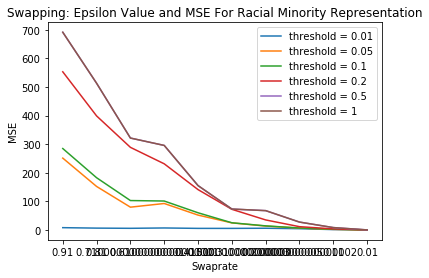

In [116]:
def run_for_swapping2(directory, thresholds, swaprates):
           
    
    for threshold in thresholds:
        mses = []
        xs = []
        for swaprate in swaprates: 
            for filename in os.listdir(directory): 
#                 print(swaprate)
#                 print(filename)
                if filename.endswith(".csv") and '_a0.csv' in filename and swaprate in filename: 
                    mse = get_mse_swap(county, directory+filename, threshold)                
                    #save filename & data
                    first = filename.find('_')
                    last = filename.rfind('_')
                    filename = filename[first+1:last]
                    mses.append(mse)
                    xs.append(filename)
        print(xs, mses)
        xs.reverse()
        mses.reverse()
        plt.plot(xs, mses, label='threshold = ' + str(threshold))
    
    axes= plt.axes()
    plt.xlabel('Swaprate')
    plt.ylabel('MSE')
    plt.title('Swapping: Epsilon Value and MSE For Racial Minority Representation')
    handles, labels = axes.get_legend_handles_labels()
    axes.legend(handles, labels, loc='upper right')


counties = ['Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
counties = ['Alameda']
for county in counties:
    print(county)
    directory = '../swapping/swap_runs3/'+county+'/similar/'
    thresholds = [.01, .05, .1, .2, .5, 1]
    #swaprates = ['_0.01', '_0.06', "_0.11", "_0.16", "_0.21"]
    swaprates = ['_0.01', "_0.11", "_0.21", "_0.31", "_0.41", "_0.51", "_0.61", "_0.71", "_0.81", "_0.91"]
    run_for_swapping2(directory, thresholds, swaprates)